<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/Python/08_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8章 ニューラルネットワーク

多層ニューラルネットワークでの識別をKerasでコーディングします。

## 準備

必要なライブラリ等を読み込みます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## データの読み込み

MNISTデータは手描き数字画像認識のためのデータセットです。学習用60000事例、評価用10000事例で、それぞれ28x28の行列で画像が表現されています。

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

パターン行列からデータを1つ取り出して、pyplotで表示します。

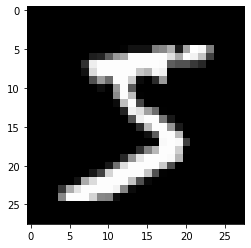

In [4]:
plt.gray()
plt.imshow(X_train[0])

正解ベクトルの最初の20要素程度を表示させて、どのようにデータが並んでいるのかを確認します。

In [5]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

入力値のとりうる範囲を0-255から0-1に変換します。

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

正解をone-hotベクトルに変換します。

In [7]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## ニューラルネットワークの構造と学習時のハイパーパラメータの設定

3層のフィードフォワード型で学習します。

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10,  activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


損失関数と最適化器を指定します。metricsは学習時に表示される数値で、学習が進んでいることを確認できるように設定します。

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

ミニバッチのサイズと、繰り返し数を指定して学習を行います。

In [10]:
model.fit(X_train, y_train, batch_size=200, epochs=3)

Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 1.1420 - acc: 0.7265
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.3342 - acc: 0.9102
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.2610 - acc: 0.9270


評価用データで評価します。

In [11]:
score = model.evaluate(X_test, y_test)
print(f"Accuracy: {score[1]:.2f}")

313/313 [==============================] - 0s 1ms/step - loss: 0.2280 - acc: 0.9355
Accuracy: 0.94


## 課題

活性化関数sigmoid、最適化器sgd（最急勾配法）で多階層ネットワークを構成し、勾配消失のために学習が進まないことを確認してください。次に、活性化関数を変更して、学習がうまくできることを確認してください。余力があれば、最適化器入れ替えの効果についても確認してください。